In [43]:
import pandas as pd
import numpy as np

path = '../data/num_file/p040.csv'
data = pd.read_csv(path)

In [44]:
data['datetime'] = pd.to_datetime(data['date'])+pd.to_timedelta(data['hour'], unit='h')
data = data.drop(['date', 'hour'], axis=1)
data.set_index('datetime', inplace=True)
data.columns = ['y']
data['y'] = data['y'].astype(float)
print(data)

                           y
datetime                    
2022-04-21 01:00:00   1033.0
2022-04-21 02:00:00     65.0
2022-04-21 12:00:00   1604.0
2022-04-25 15:00:00   4458.0
2022-04-25 16:00:00  18501.0
...                      ...
2022-09-03 07:00:00   9741.0
2022-09-03 08:00:00  19613.0
2022-09-03 09:00:00  22055.0
2022-09-03 10:00:00  14644.0
2022-09-03 11:00:00  12751.0

[3144 rows x 1 columns]


In [45]:
data = data.resample('H').mean()
data.index.freq = 'H'
print(data)

                           y
datetime                    
2022-04-21 01:00:00   1033.0
2022-04-21 02:00:00     65.0
2022-04-21 03:00:00      NaN
2022-04-21 04:00:00      NaN
2022-04-21 05:00:00      NaN
...                      ...
2022-09-03 07:00:00   9741.0
2022-09-03 08:00:00  19613.0
2022-09-03 09:00:00  22055.0
2022-09-03 10:00:00  14644.0
2022-09-03 11:00:00  12751.0

[3251 rows x 1 columns]


In [46]:
past_data = data[(data.index >= pd.to_datetime('2022-08-13 00:00:00')) & (data.index < pd.to_datetime('2022-08-15 00:00:00'))]

future_data = data[(data.index >= pd.to_datetime('2022-08-15 00:00:00')) & (data.index < pd.to_datetime('2022-08-16 00:00:00'))]

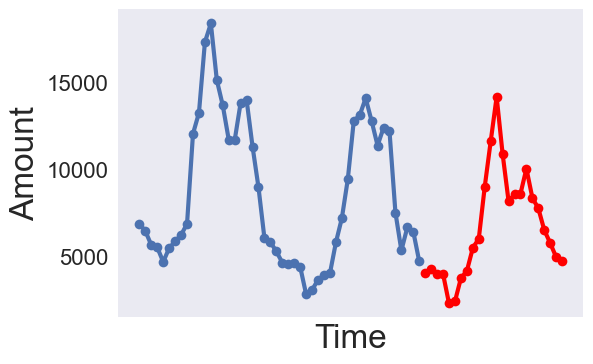

In [47]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
fontsize=24
plt.rcParams['figure.figsize'] = (6, 4)
# plt.title("Output: Amount of BLE devices at Hirose Building", fontsize=fontsize)
plt.tick_params(
    bottom=False,
    labelbottom=False,
)
# plt.xticks(fontsize=fontsize)  # Adjust the font size as needed for x-axis ticks
plt.yticks(range(0, 20000 + 1, 5000), fontsize=16)  # Adjust the font size as needed for y-axis ticks
plt.xlabel("Time", fontsize=fontsize)
plt.ylabel("Amount", fontsize=fontsize)
plt.grid()
plt.plot(past_data['y'], marker='o', linewidth=3)
plt.plot(future_data['y'], color='red', marker='o', linewidth=3)

In [48]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
